# Author Info
Name: **Ejaz-ur-Rehman**\
Business Unit Head | Data Analyst\
MBA (Accounting & Finance), MS (Finance)\
Crystal Tech (Project of MUZHAB Group)\
Karachi, Pakistan

![Date](https://img.shields.io/badge/Date-23--Aug--2025-green?logo=google-calendar)
[![Email](https://img.shields.io/badge/Email-ijazfinance%40gmail.com-blue?logo=gmail)](mailto:ijazfinance@gmail.com)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Ejaz--ur--Rehman-blue?logo=linkedin)](https://www.linkedin.com/in/ejaz-ur-rehman/)
[![GitHub](https://img.shields.io/badge/GitHub-ejazurrehman-black?logo=github)](https://github.com/ejazurrehman)



## What is Feature Scaling?

Feature scaling is a data preprocessing technique used to bring all independent variables (features) into the same range, so that no single feature dominates the model due to its scale.

Many machine learning algorithms (like KNN, SVM, Logistic Regression, Neural Networks, Gradient Descent) perform better when features are scaled because they rely on distance calculations or optimization convergence.

## Why do we need Feature Scaling?

Example:
- Feature 1: Age → range [0–100]
- Feature 2: Salary → range [20,000–200,000]

Without scaling, the model might think Salary is more important just because of its larger values, even though both features may contribute equally.

## Common Methods of Feature Scaling

### 1. Min-Max Normalization (Rescaling)
- Brings values into a fixed range (usually [0, 1]).

Formula:

- Xscaled​= Xmax​−Xmin / ​X−Xmin​

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

data = {'Age': [18, 25, 40, 60], 'Salary': [20000, 50000, 100000, 150000]}
df = pd.DataFrame(data)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

print(pd.DataFrame(scaled, columns=df.columns))


        Age    Salary
0  0.000000  0.000000
1  0.166667  0.230769
2  0.523810  0.615385
3  1.000000  1.000000


### 2. Standardization (Z-score Normalization)
- Converts data to have mean = 0 and standard deviation = 1.

Formula:

- Xscaled ​= X−μ / σ

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

print(pd.DataFrame(scaled, columns=df.columns))


        Age    Salary
0 -1.102532 -1.212183
1 -0.667731 -0.606092
2  0.263987  0.404061
3  1.506277  1.414214


### 3. Robust Scaling
- Uses median and interquartile range (IQR).
- Less sensitive to outliers.

Formula:

- Xscaled​= X−median / IQR

In [3]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled = scaler.fit_transform(df)

print(pd.DataFrame(scaled, columns=df.columns))


        Age    Salary
0 -0.666667 -0.785714
1 -0.344828 -0.357143
2  0.344828  0.357143
3  1.264368  1.071429


## When to Use What
- Min-Max Scaling → Best for algorithms needing bounded features (e.g., Neural Networks, KNN).
- Standardization → Good for algorithms assuming normal distribution (e.g., SVM, Logistic Regression, PCA).
- Robust Scaling → Good when dataset contains outliers.

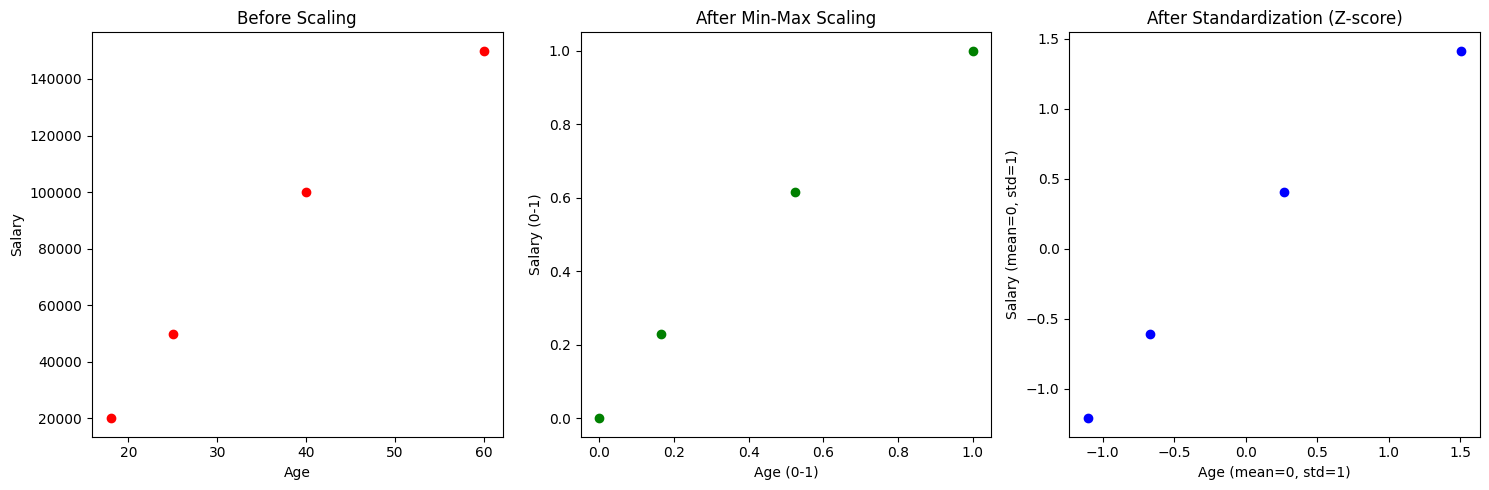

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample dataset
data = {
    "Age": [18, 25, 40, 60],
    "Salary": [20000, 50000, 100000, 150000]
}
df = pd.DataFrame(data)

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)

# Apply Standardization
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Data
axes[0].scatter(df["Age"], df["Salary"], color="red")
axes[0].set_title("Before Scaling")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Salary")

# Min-Max Scaling
axes[1].scatter(df_minmax["Age"], df_minmax["Salary"], color="green")
axes[1].set_title("After Min-Max Scaling")
axes[1].set_xlabel("Age (0-1)")
axes[1].set_ylabel("Salary (0-1)")

# Standardization
axes[2].scatter(df_std["Age"], df_std["Salary"], color="blue")
axes[2].set_title("After Standardization (Z-score)")
axes[2].set_xlabel("Age (mean=0, std=1)")
axes[2].set_ylabel("Salary (mean=0, std=1)")

plt.tight_layout()
plt.show()


## What we’ll See:
- Before Scaling: Salary dominates because values are much larger.
- After Min-Max Scaling: Both features are squeezed into [0,1].
- After Standardization: Both features centered around mean 0 with std 1.